In [156]:
import numpy as np

In [157]:
input_size=3 #no_of_features
layers = [4,3] # no of neurons in 1st and 2nd hidden layers
output_size=2

In [158]:
def softmax(a):
    
    # softmax is a probability generator for the given values
    # for xi in x: softmax(xi)= exp(xi)/(sumofall(exp(x)))
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [159]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs=None
        
    def forward(self,x):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        a3=np.tanh(z3)
        
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        
        return y_
    
    def backward(self,x,y,learning_rate=0.005):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model('W1'),self.model('W2'),self.model('W3')
        #b1,b2,b3=self.model('b1'),self.model('b2'),self.model('b3')
        
        self.activation_outputs=(a1,a2,y_)
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        

In [160]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [161]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [162]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [163]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


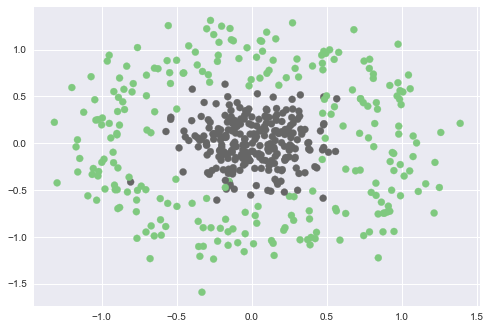

In [164]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [165]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [166]:
model.forward(X)

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [167]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print(f"for Epoch {ix+1}: The Loss occured {l}")
    
    return training_loss

In [168]:
losses=train(X,Y,model,500,0.001)

for Epoch 1: The Loss occured 0.3570778358444834
for Epoch 2: The Loss occured 0.35539016543449947
for Epoch 3: The Loss occured 0.25929981288772785
for Epoch 4: The Loss occured 0.2407145422493582
for Epoch 5: The Loss occured 0.22578256002970135
for Epoch 6: The Loss occured 0.2132015270110819
for Epoch 7: The Loss occured 0.20202048362909888
for Epoch 8: The Loss occured 0.1919060028361365
for Epoch 9: The Loss occured 0.18266687177949364
for Epoch 10: The Loss occured 0.17419320960390167
for Epoch 11: The Loss occured 0.16641108491082002
for Epoch 12: The Loss occured 0.15926137833548903
for Epoch 13: The Loss occured 0.15269226391596008
for Epoch 14: The Loss occured 0.14665577858026574
for Epoch 15: The Loss occured 0.14110684386598593
for Epoch 16: The Loss occured 0.13600303045326262
for Epoch 17: The Loss occured 0.1313046287789121
for Epoch 18: The Loss occured 0.12697475206146283
for Epoch 19: The Loss occured 0.12297939092594808
for Epoch 20: The Loss occured 0.119287396151

for Epoch 266: The Loss occured 0.043184458022018334
for Epoch 267: The Loss occured 0.043157378149507736
for Epoch 268: The Loss occured 0.04313046740320036
for Epoch 269: The Loss occured 0.04310372390433368
for Epoch 270: The Loss occured 0.04307714580579887
for Epoch 271: The Loss occured 0.04305073129147097
for Epoch 272: The Loss occured 0.043024478575552944
for Epoch 273: The Loss occured 0.042998385901933875
for Epoch 274: The Loss occured 0.04297245154356051
for Epoch 275: The Loss occured 0.04294667380182217
for Epoch 276: The Loss occured 0.04292105100594878
for Epoch 277: The Loss occured 0.042895581512421385
for Epoch 278: The Loss occured 0.042870263704395485
for Epoch 279: The Loss occured 0.04284509599113622
for Epoch 280: The Loss occured 0.04282007680746582
for Epoch 281: The Loss occured 0.04279520461322261
for Epoch 282: The Loss occured 0.04277047789273163
for Epoch 283: The Loss occured 0.042745895154286374
for Epoch 284: The Loss occured 0.04272145492964169
for E

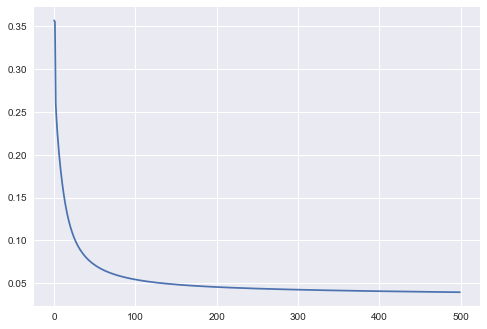

In [169]:
plt.plot(losses)
plt.show()

In [172]:
from visualize import plot_decision_boundary

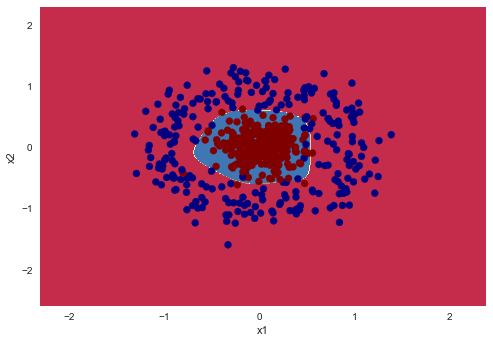

In [177]:
plot_decision_boundary(lambda x:model.predict(x), X, Y,cmap=plt.cm.jet)

In [181]:
outputs=model.predict(X)
training_accuracy=np.sum((outputs==Y)/Y.shape[0])
print(f"Traning Accuracy: {training_accuracy*100}")

Traning Accuracy: 97.00000000000003
